# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [1]:
# Install cvxopt with pip
!pip install cvxopt

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## a): Linearly Separable Dataset

In [3]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')

X = data[:, 0:2]
y = data[:, 2]

import cvxopt.solvers
from datasets import get_dataset
import linearly_separable as ls

y = y.reshape(-1, 1)
m = X.shape[0] 

z = y * X 
P = cvxopt.matrix(np.dot(z, z.T))
q = cvxopt.matrix(-1 * np.ones((m, 1))) 
A = cvxopt.matrix(y.reshape(1, -1)) 
b = cvxopt.matrix(0.0) 
 
G = cvxopt.matrix(-1 * np.eye(m)) 
h = cvxopt.matrix(np.zeros(m))
  
solution = cvxopt.solvers.qp(P, q, G, h, A, b) 
 
multipliers = np.ravel(solution['x']) 
has_positive_multiplier = multipliers > 1e-7 
sv_multipliers = multipliers[has_positive_multiplier] 
support_vectors = X[has_positive_multiplier] 
support_vectors_y = y[has_positive_multiplier] 

w = np.sum(sv_multipliers[i] * support_vectors_y[i] * support_vectors[i] for i in range(len(support_vectors_y)))
b = np.sum([support_vectors_y[i] - np.dot(w, support_vectors[i]) for i in range(len(support_vectors))])/len(support_vectors) 

     pcost       dcost       gap    pres   dres
 0: -1.2293e+01 -2.8391e+01  1e+02  1e+01  2e+00
 1: -2.5419e+01 -3.4794e+01  3e+01  3e+00  5e-01
 2: -3.6313e+01 -4.5893e+01  3e+01  2e+00  4e-01
 3: -4.3790e+01 -4.5825e+01  8e+00  4e-01  7e-02
 4: -4.3706e+01 -4.3902e+01  5e-01  2e-02  4e-03
 5: -4.3700e+01 -4.3727e+01  3e-02  5e-05  8e-06
 6: -4.3721e+01 -4.3723e+01  1e-03  2e-06  4e-07
 7: -4.3723e+01 -4.3723e+01  1e-05  2e-08  4e-09
Optimal solution found.


C:\Users\gandi\AppData\Local\Temp\ipykernel_40204\2315617634.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w = np.sum(sv_multipliers[i] * support_vectors_y[i] * support_vectors[i] for i in range(len(support_vectors_y)))


Text(0.5, 1.0, 'Separable SVM')

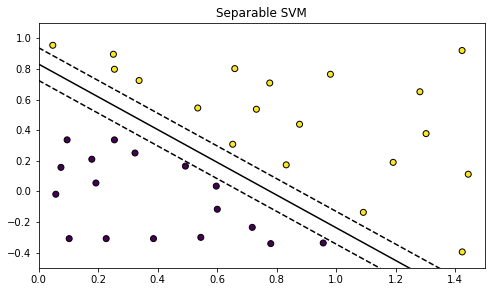

In [4]:
# plot the data
margin = 1/np.linalg.norm(w)
ax1 = plt.figure(figsize=(8, 4.5))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, edgecolors='k')
x_hyperplane = np.linspace(0, 11)
y_hyperplane = -b / w[1]
upper_margin = y_hyperplane + margin
lower_margin = y_hyperplane - margin
plt.plot(x_hyperplane, x_hyperplane * -w[0] / w[1] + y_hyperplane, 'k-')
plt.plot(x_hyperplane, x_hyperplane * -w[0] / w[1] + upper_margin, 'k--')
plt.plot(x_hyperplane, x_hyperplane * -w[0] / w[1] + lower_margin, 'k--')

plt.xlim([0, 1.5])
plt.ylim([-0.5, 1.1])
plt.title('Separable SVM')

## b) and c) : Linearly Non-separable Dataset

     pcost       dcost       gap    pres   dres
 0: -3.0198e+01 -1.1038e+01  6e+02  3e+01  5e-14
 1: -3.0101e+00 -1.0669e+01  3e+01  8e-01  5e-14
 2: -2.1035e+00 -6.2126e+00  6e+00  1e-01  8e-15
 3: -2.0595e+00 -2.6797e+00  7e-01  1e-02  5e-15
 4: -2.1895e+00 -2.4041e+00  2e-01  3e-03  4e-15
 5: -2.2354e+00 -2.3269e+00  1e-01  1e-03  4e-15
 6: -2.2630e+00 -2.2889e+00  3e-02  2e-04  4e-15
 7: -2.2726e+00 -2.2755e+00  3e-03  1e-16  4e-15
 8: -2.2739e+00 -2.2740e+00  7e-05  2e-16  4e-15
 9: -2.2739e+00 -2.2739e+00  7e-07  1e-16  4e-15
Optimal solution found.


C:\Users\gandi\AppData\Local\Temp\ipykernel_40204\3918038852.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w = np.sum(sv_multipliers[i] * support_vectors_y[i] * support_vectors[i] for i in range(len(support_vectors_y)))


Text(0.5, 1.0, 'Non Separable SVM')

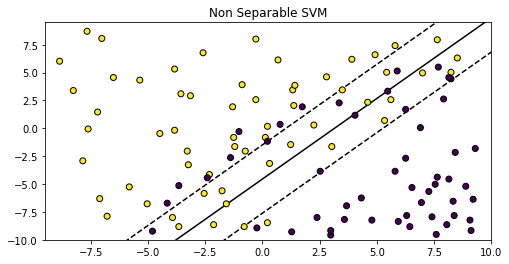

In [5]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]

m, n = x.shape
def nonlin_SVM(c, x, y, m):
    y = y.reshape(-1, 1)
    z = y * x 
    p = matrix(np.dot(z, z.T))
    q = matrix(-1 * np.ones((m, 1)))
    A = matrix(y.reshape(1, -1))
    b = matrix(0.0)
    
    G = matrix(np.vstack((-1 * np.eye(m), np.eye(m))))
    h = matrix(np.hstack((np.zeros(m), np.ones(m) * c)))
    #solvers.options['show_progress'] = False  # Turn off the summary
    solution = solvers.qp(p, q, G, h, A, b)
    multipliers = np.ravel(solution['x']) 
    has_positive_multiplier = multipliers > 1e-7
    sv_multipliers = multipliers[has_positive_multiplier] 
    support_vectors = x[has_positive_multiplier] 
    support_vectors_y = y[has_positive_multiplier] 
    w = np.sum(sv_multipliers[i] * support_vectors_y[i] * support_vectors[i] for i in range(len(support_vectors_y))) 
    b = np.sum([support_vectors_y[i] - np.dot(w, support_vectors[i]) for i in range(len(support_vectors))])/len(support_vectors) 
    return w, b
w, b = nonlin_SVM(0.05, x, y, m)
 
margin = 1 / np.linalg.norm(w)
ax1 = plt.figure(figsize=(8, 4))
x_hyperplane = np.linspace(-10, 10)
y_hyperplane = -b / w[1]
upper_margin = y_hyperplane + margin
lower_margin = y_hyperplane - margin
plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10, edgecolors='k')
plt.plot(x_hyperplane, x_hyperplane * -w[0] / w[1] + y_hyperplane, 'k-')
plt.plot(x_hyperplane, x_hyperplane * -w[0] / w[1] + upper_margin, 'k--')
plt.plot(x_hyperplane, x_hyperplane * -w[0] / w[1] + lower_margin, 'k--')

plt.xlim([-9.5, 10])
plt.ylim([-10, 9.5])
plt.title('Non Separable SVM')

     pcost       dcost       gap    pres   dres
 0: -3.1636e+01 -2.2062e+01  7e+02  2e+01  6e-14
 1: -5.6226e+00 -2.0649e+01  5e+01  1e+00  6e-14
 2: -4.1036e+00 -1.1247e+01  1e+01  2e-01  1e-14
 3: -4.1158e+00 -5.1806e+00  1e+00  2e-02  6e-15
 4: -4.3486e+00 -4.7028e+00  4e-01  5e-03  7e-15
 5: -4.4340e+00 -4.5760e+00  2e-01  1e-03  8e-15
 6: -4.4708e+00 -4.5230e+00  5e-02  3e-04  7e-15
 7: -4.4851e+00 -4.5034e+00  2e-02  8e-05  6e-15
 8: -4.4920e+00 -4.4945e+00  3e-03  6e-06  8e-15
 9: -4.4931e+00 -4.4932e+00  3e-05  8e-08  7e-15
10: -4.4931e+00 -4.4931e+00  3e-07  8e-10  9e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.7505e+01 -2.5873e+02  1e+03  3e+00  1e-13
 1: -4.0125e+01 -1.6918e+02  2e+02  3e-01  9e-14
 2: -3.7704e+01 -5.8598e+01  2e+01  2e-02  6e-14
 3: -4.1093e+01 -5.0709e+01  1e+01  8e-03  6e-14
 4: -4.2959e+01 -4.6523e+01  4e+00  2e-03  5e-14
 5: -4.3779e+01 -4.5280e+01  2e+00  7e-04  7e-14
 6: -4.4015e+01 -4.4900e+01  9e-01  2e-04  6e-1

C:\Users\gandi\AppData\Local\Temp\ipykernel_40204\3918038852.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w = np.sum(sv_multipliers[i] * support_vectors_y[i] * support_vectors[i] for i in range(len(support_vectors_y)))
C:\Users\gandi\AppData\Local\Temp\ipykernel_40204\3918038852.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w = np.sum(sv_multipliers[i] * support_vectors_y[i] * support_vectors[i] for i in range(len(support_vectors_y)))
C:\Users\gandi\AppData\Local\Temp\ipykernel_40204\3918038852.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w = np.sum(sv_multipliers[i

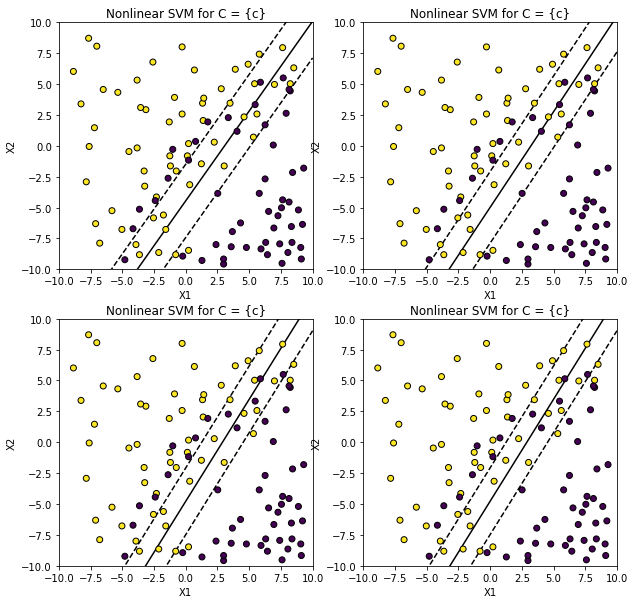

In [6]:
#Part C
def compare_c(x, y, w, b, p, f, ax, c):
    y_hyperplane = -b / w[1] 
    x_hyperplane = np.linspace(-10, 10) 
    ax[p[0], p[1]].plot(x_hyperplane, x_hyperplane * -w[0] / w[1]  + y_hyperplane, 'k')
    margin = 1 / np.linalg.norm(w)  
    upper_margin = y_hyperplane + margin
    lower_margin = y_hyperplane - margin
    ax[p[0], p[1]].scatter(x[:, 0], x[:, 1], c=y, zorder=10, edgecolors='k')
    ax[p[0], p[1]].plot(x_hyperplane, x_hyperplane * -w[0] / w[1] + upper_margin, 'k--')
    ax[p[0], p[1]].plot(x_hyperplane, x_hyperplane * -w[0] / w[1] + lower_margin, 'k--')
    
    # Lastly label each subplot:
    ax[p[0], p[1]].set_xlim([-10, 10])
    ax[p[0], p[1]].set_ylim([-10, 10])
    ax[p[0], p[1]].set_title('Nonlinear SVM for C = {c}')
    ax[p[0], p[1]].set_xlabel('X1')
    ax[p[0], p[1]].set_ylabel('X2')

data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
x = data[:, 0:2]
y = data[:, 2]
m, n = x.shape 

figure, ax = plt.subplots(2, 2, figsize=(10, 10))
w, b = nonlin_SVM(0.1, x, y, m)
compare_c(x, y, w, b, (0,0), figure, ax, 0.1)
w, b = nonlin_SVM(1, x, y, m)
compare_c(x, y, w, b, (0,1), figure, ax, 1)
w, b = nonlin_SVM(100, x, y, m)
compare_c(x, y, w, b, (1,0), figure, ax, 100)
w, b = nonlin_SVM(1000000, x, y, m)
compare_c(x, y, w, b, (1,1), figure, ax, 1000000)


### Explain your observations here:

As c increases, we can see a very minimal effect on the margin and decision boundaries; the boundary line moves towards the right slightly with the increase. Another key thing we see is that the slope of the line changes as c increases. But the issue with this is that there is no direct correlation because we see that the intercept decreases as c goes from 0.1 to 1, but it also increases as c goes from 100 to 1000000. 